In [30]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import random
random.seed(2814)

In [31]:
X_train = pd.read_csv('../data/interim/1_X_train.csv')
X_test = pd.read_csv('../data/interim/1_X_test.csv')
y_train = pd.read_csv('../data/interim/1_y_train.csv')
y_test = pd.read_csv('../data/interim/1_y_test.csv')

In [32]:
X_train

,GroundFloorArea(sq m),InsulationThickness,TotalDeliveredEnergy,YearofConstruction_1753,YearofConstruction_1757,YearofConstruction_1759,YearofConstruction_1760,YearofConstruction_1761,YearofConstruction_1762,YearofConstruction_1764,...,StructureType_Masonry,StructureType_Timber or Steel Frame,InsulationType_Factory Insulated,InsulationType_Loose Jacket,InsulationType_None,NoOfSidesSheltered_four,NoOfSidesSheltered_one,NoOfSidesSheltered_three,NoOfSidesSheltered_two,NoOfSidesSheltered_zero
0,0.041128,0.016026,0.001022,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
1,0.038657,0.000000,0.011529,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0.032150,0.018697,0.003486,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0.046305,0.022650,0.004352,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,0.050612,0.000000,0.010839,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494355,0.007039,0.000000,0.001925,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1494356,0.018644,0.014592,0.006656,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1494357,0.010572,0.000000,0.003716,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1494358,0.020324,0.013383,0.013286,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [21]:
# Get a stratified sample of training data to train the model with. Do not touch testing data
df = pd.concat([X_train, y_train], axis = 1)
df_sample = df.groupby('EnergyRating', group_keys=False).apply(lambda x: x.sample(1334))
X_train = df_sample.iloc[:, :-1] # Independent Variables
y_train = df_sample.iloc[:, -1] # Dependent Variables

In [22]:
X_train

,GroundFloorArea(sq m),InsulationThickness,TotalDeliveredEnergy,YearofConstruction_1753,YearofConstruction_1757,YearofConstruction_1759,YearofConstruction_1760,YearofConstruction_1761,YearofConstruction_1762,YearofConstruction_1764,...,StructureType_Masonry,StructureType_Timber or Steel Frame,InsulationType_Factory Insulated,InsulationType_Loose Jacket,InsulationType_None,NoOfSidesSheltered_four,NoOfSidesSheltered_one,NoOfSidesSheltered_three,NoOfSidesSheltered_two,NoOfSidesSheltered_zero
877686,0.036872,0.020198,0.001382,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
859613,0.084688,0.015980,0.001585,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
880313,0.046537,0.026709,0.001473,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
848720,0.032891,0.000306,0.001274,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
849730,0.042844,0.012194,0.001436,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451248,0.024541,0.042735,0.007971,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1485843,0.016573,0.019647,0.006223,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1458947,0.020782,0.017056,0.004820,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1470725,0.018041,0.010845,0.005355,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [33]:
# Modelling
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=2814)
dt.fit(X_train, y_train.values.ravel())

y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

/Users/oisinbrannock/.pyenv/versions/3.10.5/envs/masters_thesis/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


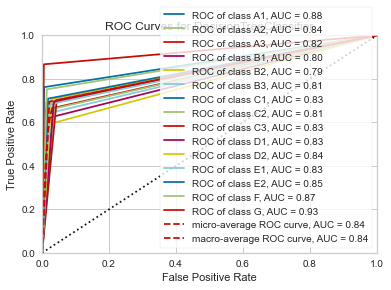

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1',
                'D2', 'E1', 'E2', 'F', 'G'],
       estimator=DecisionTreeClassifier(random_state=2814))

In [28]:
roc_auc(dt, X_train, y_train, X_test=X_test, y_test=y_test, classes=['A1','A2','A3','B1','B2','B3','C1','C2','C3','D1','D2','E1','E2','F','G'])    

In [43]:
param_dict = {
    'criterion': ['gini', 'entropy']
    ,'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    ,'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    ,'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
    ,'n_estimators': [100,120,140,160,180,200]
}

In [44]:
grid = GridSearchCV(
    dt
    ,param_dict
    ,cv=5
    ,verbose=1
    ,n_jobs=-1
)

In [45]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=30,
                                              min_samples_leaf=5,
                                              random_state=2814),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [48]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 3,
 'min_samples_split': 9}

In [49]:
grid.best_score_

0.7128435782108945

In [26]:
rf = RandomForestClassifier(
    random_state=2814
)
rf.fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          A1       0.14      0.75      0.24       252
          A2       0.74      0.74      0.74      8648
          A3       0.74      0.67      0.70     10239
          B1       0.29      0.60      0.39      3052
          B2       0.28      0.43      0.34      6563
          B3       0.36      0.37      0.36     15594
          C1       0.38      0.33      0.35     22757
          C2       0.37      0.32      0.34     24906
          C3       0.36      0.33      0.34     23637
          D1       0.37      0.32      0.34     22871
          D2       0.38      0.31      0.34     19637
          E1       0.27      0.32      0.29     11326
          E2       0.25      0.31      0.28      8956
           F       0.33      0.38      0.35      9269
           G       0.68      0.73      0.71     13363

    accuracy                           0.40    201070
   macro avg       0.39      0.46      0.41    201070
weighted avg       0.41   

In [24]:
param_dict = {
    'criterion': ['gini', 'entropy']
    ,'max_depth': [50, None]
    ,'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10]
    ,'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
    ,'n_estimators': [100,200]
}

In [25]:
grid = GridSearchCV(
    rf
    ,param_dict
    ,cv=5
    ,verbose=1
    ,n_jobs=-1
)

In [26]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2814),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [50, None],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200]},
             verbose=1)

In [27]:
grid.best_estimator_

RandomForestClassifier(min_samples_leaf=3, n_estimators=200, random_state=2814)

In [28]:
grid.best_score_

0.4324337831084458

In [29]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}